By: Zahrah Aulia Putri

In [1]:
# Import Data
import pandas as pd
file_path = "https://raw.githubusercontent.com/zahrahaulia21/Tugas-Analisis-Data-Tidak-Terstruktur/main/Netflix.csv"

df = pd.read_csv(file_path)
df.head()

,reviewId,content,score
0,e689fd8c-c14d-4f32-9442-bde33abdcb1b,super like ..,5
1,dd148d4d-c226-484e-86a7-2020a98e3bcb,My 5-year old is being offered NC-17 mobile ga...,1
2,cae2c1b9-2144-4c80-85e4-33765e8f0519,Terrible company. I had Netflix for a long tim...,1
3,0b23c451-6eaa-42f6-a231-ba6befb2c201,amazing shows just sad that things I like get ...,4
4,39a2dd84-d8f0-499c-8f7d-b2e9478c55ac,Excellent,5


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   reviewId  10000 non-null  object
 1   content   10000 non-null  object
 2   score     10000 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 234.5+ KB


Data mengandung 10.000 ulasan terhadap aplikasi Netflix di Google Play Store yang diperbarui pada 24 Maret 2025. Data diperoleh dari [Kaggle](https://www.kaggle.com/datasets/odins0n/top-20-play-store-app-reviews-daily-update?select=Netflix.csv). Data terdiri dari tiga kolom, yaitu:
*   reviewId: berisikan ID dari ulasan yang diberikan
*   content: berisikan ulasan yang diberikan
*   score: berisikan skor bintang yang diberikan dengan *range* 1-5.

Metode analisis yang digunakan adalah *sentiment analysis* yang bertujuan untuk mengetahui sentimen pengguna terhadap aplikasi Netflix.

# Pre-Processing

In [3]:
print('Missing value:')
print(df.isnull().sum())

print('\n\nData duplikat:')
print(df.duplicated().sum())

Missing value:
reviewId    0
content     0
score       0
dtype: int64


Data duplikat:
0


Tidak terdapat *missing value* dan duplikasi pada data.

Akan dibentuk kolom 'sentimen' dengan nilai positif, netral, atau negatif. Nilai dari kolom sentimen diperoleh berdasarkan kolom 'score'. Jika score kurang dari 3, maka ulasan dilabeli sebagai sentimen negatif. Jika score sama dengan 3, maka ulasan dilabeli sebagai sentimen netral. Serta, jika score lebih dari 3, maka ulasan dilabeli sebagai sentimen positif.

In [4]:
df['sentimen'] = df['score'].apply(lambda x:
                                   'Negatif' if x < 3 else
                                   'Positif' if x > 3 else
                                   'Netral')
df.sample(10)

,reviewId,content,score,sentimen
7688,a2c2fee3-c22e-42de-9bda-94cbd92cb047,The app is terrible on ROKu now I'm forced to ...,1,Negatif
3155,f9aaf2e6-3f96-463d-a50f-671fdf991914,It's Amazing,5,Positif
8578,18a717a0-6e09-42a2-892a-e490793a52fa,Good,5,Positif
9527,2a0dcc44-8be6-469e-a8fc-e693ffb9ff6d,Can't even watch livestream on my updated devi...,2,Negatif
6891,ec1376f7-350a-4dee-b579-1452028e05ce,👍,5,Positif
267,33c51b03-803d-46b5-8d67-d3638f4ee785,I love it,5,Positif
345,8c9fd3ef-3412-40c7-9d34-ead5ef9f82b2,I'm unable to pay my subscription while travel...,1,Negatif
6003,d1fb5ddb-dfc3-45d4-801f-006b79968183,אם יש לך משתמש אז הסתדרת מצוין כי יהיה לך המון...,5,Positif
8850,945d400d-6a86-47a9-a3cc-f3b29bba8619,Series and films option on the top is not disp...,3,Netral
2405,27bf03de-b927-492a-ba87-6b2a5875e513,This app dims the screen while playing a video...,1,Negatif


In [5]:
# Kolom yang dibutuhkan untuk analisis lebih lanjut adalah kolom content dan sentimen
df = df[['content','sentimen']]
df.head()

,content,sentimen
0,super like ..,Positif
1,My 5-year old is being offered NC-17 mobile ga...,Negatif
2,Terrible company. I had Netflix for a long tim...,Negatif
3,amazing shows just sad that things I like get ...,Positif
4,Excellent,Positif


In [6]:
# Membuat semua kata di kolom komentar berhuruf kecil
df['content'] = df['content'].str.lower()

<ipython-input-6-d47ebe450e78>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['content'] = df['content'].str.lower()


In [7]:
# Menghapus tanda baca
import string
def remove_punctuation(words):
    return words.translate(str.maketrans('','',string.punctuation))
df['content'] = df['content'].apply(remove_punctuation)
df.head(10)

,content,sentimen
0,super like,Positif
1,my 5year old is being offered nc17 mobile game...,Negatif
2,terrible company i had netflix for a long time...,Negatif
3,amazing shows just sad that things i like get ...,Positif
4,excellent,Positif
5,is good i like,Positif
6,good so far,Positif
7,very entertaining,Positif
8,need more movies 🎬 in english i dont want to r...,Netral
9,unable to sign up,Negatif


In [8]:
# Tokenization
import nltk
nltk.download('punkt_tab')
from nltk.tokenize import word_tokenize

df['content'] = df['content'].apply(word_tokenize)

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [9]:
# Stopwords
import requests

file_path1 = "https://raw.githubusercontent.com/zahrahaulia21/Tugas-Analisis-Data-Tidak-Terstruktur/main/stopwords.txt"
response = requests.get(file_path1)

custom_stop_words = []

if response.status_code == 200:
    custom_stop_words = response.text.split("\n")
    custom_stop_words = [word.strip() for word in custom_stop_words if word.strip()]
    print(f"List stopword terdiri dari {len(custom_stop_words)} kata")
    print("Sepuluh kata yang termasuk stopwords adalah", custom_stop_words[:10])
else:
    print(f"Error: Gagal mengunduh file")

List stopword terdiri dari 350 kata
Sepuluh kata yang termasuk stopwords adalah ['a', 'about', 'above', 'according', 'across', 'actually', 'adj', 'after', 'afterwards', 'again']


In [10]:
# Menghapus stopwords
def remove_stop_word(words):
    return [word for word in words if word not in custom_stop_words]

custom_stop_words.extend(["i","im","netflix","app"])

df['content'] = df['content'].apply(remove_stop_word)

# Join
df['content'] = df['content'].apply(' '.join)
df.head(10)

,content,sentimen
0,super,Positif
1,5year old offered nc17 mobile game content tab...,Negatif
2,terrible company long time decided change coup...,Negatif
3,amazing shows sad things get removed loving cr...,Positif
4,excellent,Positif
5,good,Positif
6,good far,Positif
7,entertaining,Positif
8,need movies 🎬 english want read want listen en...,Netral
9,unable sign,Negatif


In [11]:
# Stemming
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()
df['content'] = df['content'].apply(lambda x: ' '.join([stemmer.stem(word) for word in x.split()]))

df.head(5)

,content,sentimen
0,super,Positif
1,5year old offer nc17 mobil game content tablet...,Negatif
2,terribl compani long time decid chang coupl di...,Negatif
3,amaz show sad thing get remov love creatur cas...,Positif
4,excel,Positif


# EDA

<ipython-input-12-6e2fd11eb608>:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('Set3', len(jumlah_komentar))


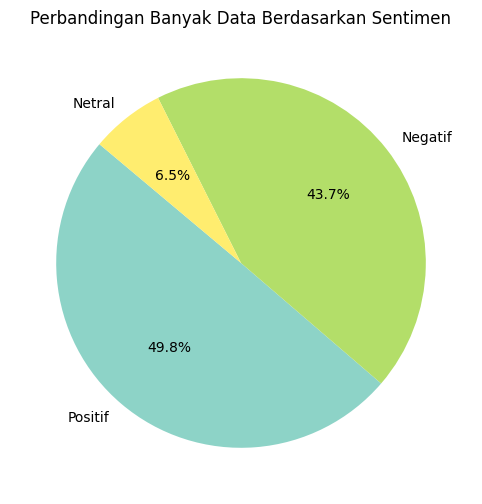

In [12]:
# Perbandingan data berdasarkan sentimen
import matplotlib.pyplot as plt

jumlah_komentar = df['sentimen'].value_counts()

cmap = plt.cm.get_cmap('Set3', len(jumlah_komentar))
colors = [cmap(i) for i in range(len(jumlah_komentar))]

plt.figure(figsize=(8,6))
plt.pie(jumlah_komentar, labels=['Positif', 'Negatif', 'Netral'], autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Perbandingan Banyak Data Berdasarkan Sentimen')
plt.show()

Dari 10.000 ulasan, terdapat 4981 ulasan (49,8%) dengan sentimen positif, 4371 ulasan (43,7%) dengan sentimen negatif, dan 648 ulasan (6,5%) dengan sentimen netral.

## Wordcloud dari Setiap Sentimen

In [13]:
from wordcloud import WordCloud
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from collections import Counter

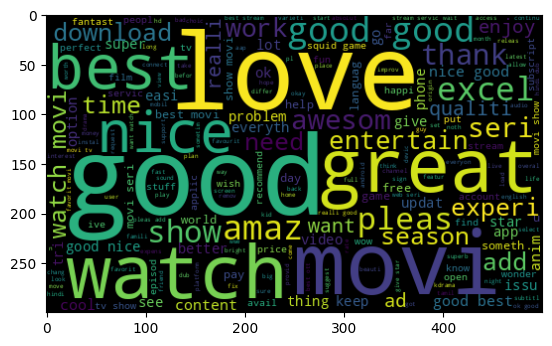

In [27]:
# Positif
df_positif = df[df['sentimen'] == 'Positif']
all_words_positif = ' '.join([twts for twts in df_positif['content']])
wordcloud_positif = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(all_words_positif)

plt.imshow(wordcloud_positif, interpolation="bilinear")

# plt.axis('off')
plt.title('Word Cloud dari Sentimen Positif')
plt.show()

Sepuluh kata yang banyak muncul pada ulasan dengan sentimen positif adalah good, movi (movie), love, watch, best, nice, great, show, pleas (please), dan amaz (amazing).

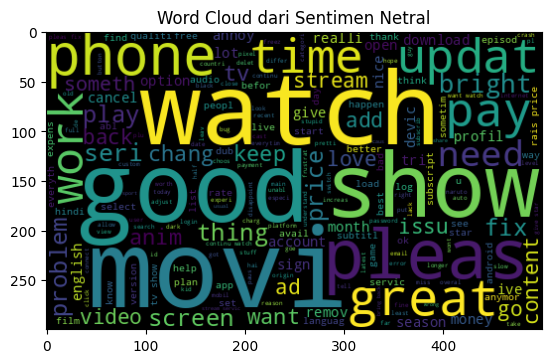

In [15]:
# Netral
df_netral = df[df['sentimen'] == 'Netral']
all_words_netral = ' '.join([twts for twts in df_netral['content']])
wordcloud_netral = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(all_words_netral)

plt.imshow(wordcloud_netral, interpolation="bilinear")

# plt.axis('off')
plt.title('Word Cloud dari Sentimen Netral')
plt.show()

Sepuluh kata yang banyak muncul pada ulasan dengan sentimen netral adalah movi (movie), watch, good, show, pleas (please), get, phone, updat (update), time, dan great.

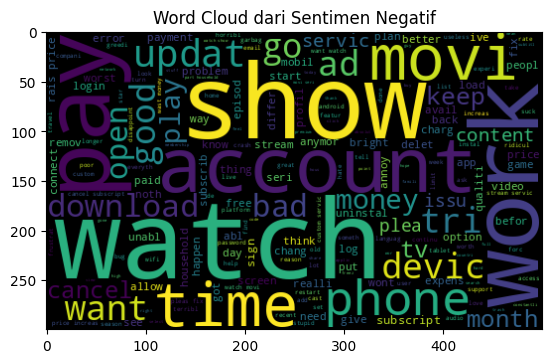

In [16]:
# Negatif
df_negatif = df[df['sentimen'] == 'Negatif']
all_words_negatif = ' '.join([twts for twts in df_negatif['content']])
wordcloud_negatif = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(all_words_negatif)

plt.imshow(wordcloud_negatif, interpolation="bilinear")

# plt.axis('off')
plt.title('Word Cloud dari Sentimen Negatif')
plt.show()

Sepuluh kata yang banyak muncul pada ulasan dengan sentimen negatif adalah watch, show, movi (movie), work, get, pay, account, price, phone, dan time.

# Pemodelan

## Distribusi Target

In [17]:
temp = df.groupby('sentimen').count()['content'].reset_index().sort_values(by='content',ascending=False)
temp

,sentimen,content
2,Positif,4981
0,Negatif,4371
1,Netral,648


In [18]:
# TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(df['content'])

In [19]:
# Splitting Data menjadi 80% train data dan 20% test data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_tfidf, df['sentimen'], test_size=0.2, random_state=21)
X_train.shape, X_test.shape

((8000, 7892), (2000, 7892))

## Resampling Target

Jumlah ulasan untuk sentimen netral, positif, dan negatif tidak merata. Oleh karena itu, untuk pemodelan, akan dilakukan *resampling* agar jumlah ulasan untuk setiap sentimen sama.

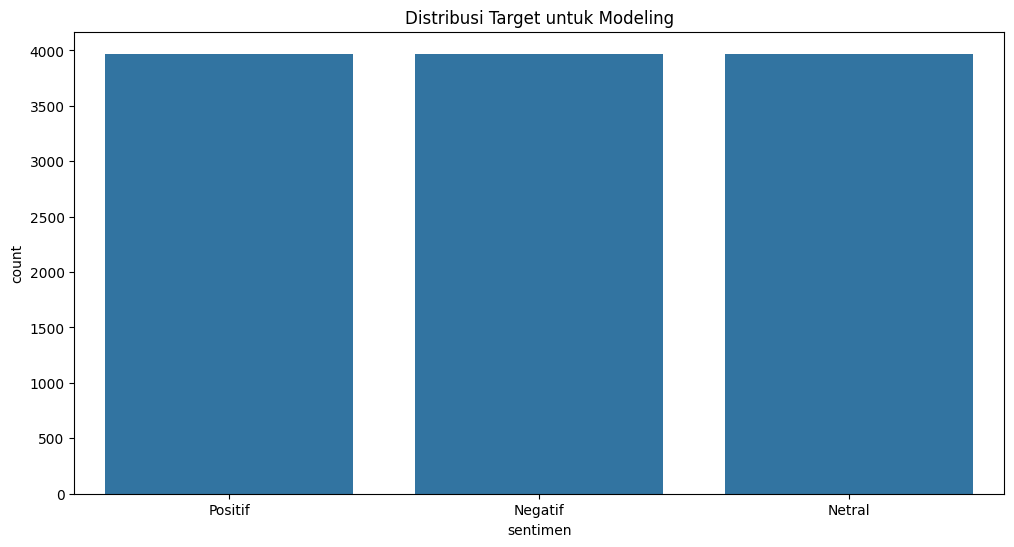

In [20]:
from imblearn.over_sampling import SMOTE
import seaborn as sns

smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

plt.figure(figsize=(12, 6))
sns.countplot(x=y_train)
plt.title('Distribusi Target untuk Modeling')
plt.show()

## Model

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from scipy.stats import uniform
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.metrics import classification_report

### Random Forest

In [22]:
# init parameters
rf_param_dist = {'n_estimators': [50, 100, 200],
                 'max_depth': [None, 10, 20, 30],
                 'min_samples_split': [2, 5, 10],
                 'min_samples_leaf': [1, 2, 4]}

# Model Random Forest
rf_model = RandomizedSearchCV(RandomForestClassifier(random_state=21), rf_param_dist, n_iter=10, cv=5, scoring='accuracy', random_state=21)
rf_model.fit(X_train, y_train)

print("Best Parameters:", rf_model.best_params_)
print("Best CV Accuracy:", rf_model.best_score_)

Best Parameters: {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_depth': 30}
Best CV Accuracy: 0.7507976490344248


In [23]:
# Evaluasi Model
y_pred_rf = rf_model.best_estimator_.predict(X_test)

print("\n\nClassification Report for Random Forest (Tuned):")
print(classification_report(y_test, y_pred_rf))



Classification Report for Random Forest (Tuned):
              precision    recall  f1-score   support

     Negatif       0.77      0.73      0.75       857
      Netral       0.12      0.06      0.08       132
     Positif       0.78      0.86      0.82      1011

    accuracy                           0.75      2000
   macro avg       0.56      0.55      0.55      2000
weighted avg       0.73      0.75      0.74      2000



Nilai *precision* menunjukkan bahwa:
1. Negatif 0,77 -> Dari semua hasil prediksi negatif, 77% benar.
2. Netral 0,12 -> Dari semua hasil prediksi netral, 12% benar.
3. Positif 0,78 -> Dari semua hasil prediksi positif, 78% benar.

Nilai *recall* menunjukkan bahwa:
1. Negatif 0,73 -> Dari semua data negatif, 73% berhasil dideteksi model.
2. Netral 0,06 -> Dari semua data netral, 6% berhasil dideteksi model.
3. Positif 0,86 -> Dari semua data positif, 86% berhasil dideteksi model.  

---

* Nilai *accuracy* sebesar 0,75 menunjukkan bahwa model berhasil mengklasifikasikan 75% ulasan ke dalam sentimen yang benar.  

* Metrik pengukuran kebaikan model bergantung pada tujuan analisis. Jika ingin
mengetahui ulasan negatif untuk memperbaiki layanan dan ingin kesalahan pengklasifikasian ulasan negatif menjadi ulasan positif atau netral sekecil mungkin, maka dapat menggunakan nilai *recall*.  

* Nilai F1-Score yang semakin mendekati 1 menunjukkan model klasifikasi memiliki performa yang semakin baik. Nilai F1-Score untuk sentimen negatif dan positif cukup mendekati 1 yang menunjukkan model cukup baik dalam mendeteksi ulasan negatif dan positif. Akan tetapi, untuk sentimen netral, nilai F1-Score sangat jauh dari 1 yang menunjukkan model kurang dapat mendeteksi ulasan netral dengan baik.

### k-NN

In [24]:
knn_param_dist = {'n_neighbors': randint(1, 50),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']}

knn_model = RandomizedSearchCV(KNeighborsClassifier(), knn_param_dist, n_iter=10, cv=5, n_jobs=-1, random_state=21)
knn_model.fit(X_train, y_train)

print("Best Parameters:", knn_model.best_params_)
print("Best CV Accuracy:", knn_model.best_score_)

Best Parameters: {'metric': 'minkowski', 'n_neighbors': 11, 'weights': 'uniform'}
Best CV Accuracy: 0.5268681780016793


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:1108: UserWarning: One or more of the test scores are non-finite: [       nan 0.43702771 0.4559194  0.52686818 0.48790932 0.41687657
 0.43702771 0.45020991 0.51746432        nan]
  warnings.warn(


In [25]:
# Evaluasi Model
y_pred_knn = knn_model.predict(X_test)

print("\n\nClassification Report for k-NN (Tuned):")
print(classification_report(y_test, y_pred_knn))



Classification Report for k-NN (Tuned):
              precision    recall  f1-score   support

     Negatif       0.75      0.15      0.25       857
      Netral       0.09      0.80      0.16       132
     Positif       0.86      0.57      0.68      1011

    accuracy                           0.40      2000
   macro avg       0.57      0.50      0.37      2000
weighted avg       0.76      0.40      0.46      2000



Nilai *precision* menunjukkan bahwa:
1. Negatif 0,75 -> Dari semua hasil prediksi negatif, 75% benar.
2. Netral 0,09 -> Dari semua hasil prediksi netral, 9% benar.
3. Positif 0,86 -> Dari semua hasil prediksi positif, 86% benar.

Nilai *recall* menunjukkan bahwa:
1. Negatif 0,15 -> Dari semua data negatif, 15% berhasil dideteksi model.
2. Netral 0,80 -> Dari semua data netral, 80% berhasil dideteksi model.
3. Positif 0,57 -> Dari semua data positif, 57% berhasil dideteksi model.  

---

* Nilai *accuracy* sebesar 0,40 menunjukkan bahwa model berhasil mengklasifikasikan 40% ulasan ke dalam sentimen yang benar.  

* Metrik pengukuran kebaikan model bergantung pada tujuan analisis. Jika ingin
mengetahui ulasan negatif untuk memperbaiki layanan dan ingin kesalahan pengklasifikasian ulasan negatif menjadi ulasan positif atau netral sekecil mungkin, maka dapat menggunakan nilai *recall*.  

* Nilai F1-Score yang semakin mendekati 1 menunjukkan model klasifikasi memiliki performa yang semakin baik. Nilai F1-Score untuk sentimen positif cukup mendekati 1 yang menunjukkan model cukup baik dalam mendeteksi ulasan positif. Akan tetapi, untuk sentimen negatif dan netral, nilai F1-Score cukup jauh dari 1 yang menunjukkan model kurang dapat mendeteksi ulasan negatif dan netral dengan baik.

### Support Vector Machine

In [28]:
svm_param_dist = {
    'C': uniform(0.1, 10),
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'gamma': ['scale', 'auto']}

svm_model = RandomizedSearchCV(SVC(), svm_param_dist, n_iter=10, cv=5, n_jobs=-1, random_state=21)
svm_model.fit(X_train, y_train)

print("Best Parameters:", svm_model.best_params_)
print("Best CV Accuracy:", svm_model.best_score_)

Best Parameters: {'C': np.float64(5.059295498261557), 'gamma': 'auto', 'kernel': 'linear'}
Best CV Accuracy: 0.7727120067170444


In [29]:
# Evaluasi Model
y_pred_svm = svm_model.predict(X_test)

print("\n\nClassification Report for SVM (Tuned):")
print(classification_report(y_test, y_pred_svm))



Classification Report for SVM (Tuned):
              precision    recall  f1-score   support

     Negatif       0.76      0.74      0.75       857
      Netral       0.08      0.19      0.11       132
     Positif       0.84      0.71      0.77      1011

    accuracy                           0.69      2000
   macro avg       0.56      0.55      0.54      2000
weighted avg       0.76      0.69      0.72      2000



Nilai *precision* menunjukkan bahwa:
1. Negatif 0,76 -> Dari semua hasil prediksi negatif, 76% benar.
2. Netral 0,08 -> Dari semua hasil prediksi netral, 8% benar.
3. Positif 0,84 -> Dari semua hasil prediksi positif, 84% benar.

Nilai *recall* menunjukkan bahwa:
1. Negatif 0,74 -> Dari semua data negatif, 74% berhasil dideteksi model.
2. Netral 0,19 -> Dari semua data netral, 19% berhasil dideteksi model.
3. Positif 0,71 -> Dari semua data positif, 71% berhasil dideteksi model.  

---

* Nilai *accuracy* sebesar 0,69 menunjukkan bahwa model berhasil mengklasifikasikan 69% ulasan ke dalam sentimen yang benar.  

* Metrik pengukuran kebaikan model bergantung pada tujuan analisis. Jika ingin
mengetahui ulasan negatif untuk memperbaiki layanan dan ingin kesalahan pengklasifikasian ulasan negatif menjadi ulasan positif atau netral sekecil mungkin, maka dapat menggunakan nilai *recall*.  

* Nilai F1-Score yang semakin mendekati 1 menunjukkan model klasifikasi memiliki performa yang semakin baik. Nilai F1-Score untuk sentimen positif dan negatif cukup mendekati 1 yang menunjukkan model cukup baik dalam mendeteksi ulasan positif dan negatif. Akan tetapi, untuk sentimen netral, nilai F1-Score cukup jauh dari 1 yang menunjukkan model kurang dapat mendeteksi ulasan netral dengan baik.